# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import log10
from calendar import month_abbr
from datetime import datetime

# Loading and Preprocessing Bitcoin Historical Data

In [2]:
usecols = ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
df = pd.read_csv('Bitcoin Historical Data - Investing.com India.csv', usecols=usecols, thousands=',')
column = 'Change %'
df[column] = df[column].str.rstrip('%').astype('float') / 100.0
column = 'Vol.'
df[column] = df[column].apply(lambda x: float(x[:-1]) * {'K': 1e3, 'M': 1e6, 'B': 1e9}[x[-1]])

df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,Jun 23,26931.0,27216.4,27410.2,24838.0,1060000.0,-0.0105
1,May 23,27216.1,29252.1,29816.4,25853.1,1660000.0,-0.0696
2,Apr 23,29252.1,28473.7,30964.9,27054.3,2030000.0,0.0273
3,Mar 23,28473.7,23130.6,29160.4,19591.8,10260000.0,0.2310
4,Feb 23,23130.5,23124.7,25236.8,21418.7,9090000.0,0.0002


# Preprocessing Date Data and Sorting

In [3]:
# build a map of month abbreviations to month numbers

month_converter = {month: index for index, month in enumerate(month_abbr) if month}

# convert the dates to the 15th of each month

def fix_date(arg:str) -> datetime:
    pieces = arg.split()
    year = 2000 + int(pieces[1])
    month = month_converter[pieces[0]]
    day = 15
    return datetime(year=year, day=day, month=month)
df['date'] = df['Date'].apply(fix_date)

df = df.sort_values(by=['date'], ascending=True, )
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,date
154,Aug 10,0.1,0.1,0.1,0.0,221740.0,0.0000,2010-08-15
153,Sep 10,0.1,0.1,0.2,0.1,216810.0,0.0000,2010-09-15
152,Oct 10,0.2,0.1,0.2,0.0,1110000.0,2.1099,2010-10-15
151,Nov 10,0.2,0.2,0.5,0.1,826250.0,0.0000,2010-11-15
150,Dec 10,0.3,0.2,0.3,0.2,263650.0,0.4409,2010-12-15


In [4]:
df.dtypes


Date                object
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %           float64
date        datetime64[ns]
dtype: object

In [5]:
df.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
date        0
dtype: int64

# Plotting Bitcoin Prices

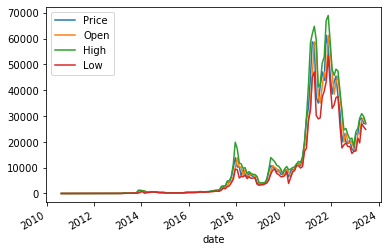

In [6]:
# plot the prices
%matplotlib inline
columns = ['date', 'Price']
ax = df[columns].set_index('date').plot()
for column in ['Open', 'High', 'Low']:
    df[['date', column]].set_index('date').plot(ax=ax)

In [7]:
df.describe()

,Price,Open,High,Low,Vol.,Change %
count,155.000000,155.000000,155.000000,155.000000,1.550000e+02,155.000000
mean,9348.067097,9215.347742,10884.615484,7731.291613,3.986781e+08,0.159246
std,14591.849682,14555.344121,16996.547305,12094.010391,3.652347e+09,0.573747
min,0.100000,0.100000,0.100000,0.000000,8.575000e+04,-0.388700
25%,214.850000,176.550000,247.150000,115.500000,1.225000e+06,-0.080450
50%,1079.100000,965.500000,1239.900000,771.000000,2.210000e+06,0.028200
75%,10299.650000,10300.650000,12168.900000,9176.950000,6.580000e+06,0.258450
max,61309.600000,61310.100000,68990.600000,53448.300000,4.370000e+10,4.709400


# Plotting Bitcoin Volume

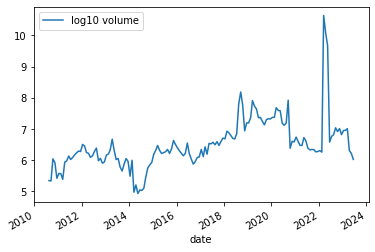

In [8]:
# finally plot the volume
column = 'Vol.'
df['log10 volume'] = df[column].apply(log10)
column = 'log10 volume'
df[['date', column]].set_index('date').plot()